In [1]:
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
# Read ROOT file and store data into awkward array
with uproot.open("dataset_mu0.root:fastjet") as f:
    trk_d0_mu0 = f["trk_d0"].array()
    trk_z0_mu0 = f["trk_z0"].array()
    trk_label_mu0 = f["trk_label"].array()
with uproot.open("dataset_mu60.root:fastjet") as f:
    trk_d0_mu60 = f["trk_d0"].array()
    trk_z0_mu60 = f["trk_z0"].array()
    trk_label_mu60 = f["trk_label"].array()

In [3]:
# Find where label is HS and PU
# Generate boolean mask mu=0
HS_mask_mu0 = (trk_label_mu0==-1)
PU_mask_mu0 = (trk_label_mu0!=-1)
# Generate boolean mask mu=60
HS_mask_mu60 = (trk_label_mu60==-1)
PU_mask_mu60 = (trk_label_mu60!=-1)

In [4]:
# Verfiy Mask is working
print("\u03BC=0")
print(trk_label_mu0[HS_mask_mu0])
print(trk_label_mu0[PU_mask_mu0])
print()
print("\u03BC=60")
print(trk_label_mu60[HS_mask_mu60])
print(trk_label_mu60[PU_mask_mu60])

μ=0
[[-1, -1, -1, -1, -1, -1, -1, -1, -1, ..., -1, -1, -1, -1, -1, -1, -1, -1], ...]
[[], [], [], [], [], [], [], [], [], ..., [], [], [], [], [], [], [], [], []]

μ=60
[[-1, -1, -1, -1, -1, -1, -1, -1, -1, ..., -1, -1, -1, -1, -1, -1, -1, -1], ...]
[[26, 56, 26, 55, 56, 52, 55, 14, 40, ..., 34, 55, 44, 54, 6, 34, 26, 52], ...]


In [5]:
# Apply mask to separate HS and PU mu=0
HS_d0_mu0 = trk_d0_mu0[HS_mask_mu0]
HS_z0_mu0 = trk_z0_mu0[HS_mask_mu0]
PU_d0_mu0 = trk_d0_mu0[PU_mask_mu0]
PU_z0_mu0 = trk_z0_mu0[PU_mask_mu0]
# Apply mask to separate HS and PU mu=60
HS_d0_mu60 = trk_d0_mu60[HS_mask_mu60]
HS_z0_mu60 = trk_z0_mu60[HS_mask_mu60]
PU_d0_mu60 = trk_d0_mu60[PU_mask_mu60]
PU_z0_mu60 = trk_z0_mu60[PU_mask_mu60]

In [6]:
# Flatten the arrays before plotting mu=60
HS_d0_mu0 = ak.flatten(HS_d0_mu0)
HS_z0_mu0 = ak.flatten(HS_z0_mu0)
PU_d0_mu0 = ak.flatten(PU_d0_mu0)
PU_z0_mu0 = ak.flatten(PU_z0_mu0)
# Flatten the arrays before plotting mu=60
HS_d0_mu60 = ak.flatten(HS_d0_mu60)
HS_z0_mu60 = ak.flatten(HS_z0_mu60)
PU_d0_mu60 = ak.flatten(PU_d0_mu60)
PU_z0_mu60 = ak.flatten(PU_z0_mu60)

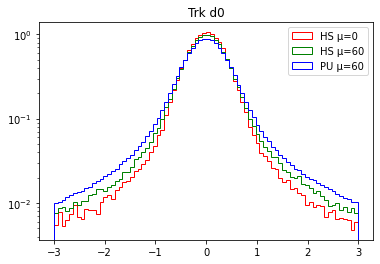

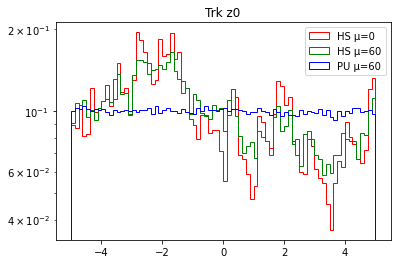

In [7]:
# Plot the flattened arrays
plt.hist(HS_d0_mu0,histtype='step',bins=80,range=(-3,3),color='r',label='HS \u03BC=0',density=True)
plt.hist(HS_d0_mu60,histtype='step',bins=80,range=(-3,3),color='g',label='HS \u03BC=60',density=True)
plt.hist(PU_d0_mu60,histtype='step',bins=80,range=(-3,3),color='b',label='PU \u03BC=60',density=True)
plt.title("Trk d0")
plt.yscale('log')
plt.legend()
plt.show()
plt.hist(HS_z0_mu0,histtype='step',bins=80,range=(-5,5),color='r',label='HS \u03BC=0',density=True)
plt.hist(HS_z0_mu60,histtype='step',bins=80,range=(-5,5),color='g',label='HS \u03BC=60',density=True)
plt.hist(PU_z0_mu60,histtype='step',bins=80,range=(-5,5),color='b',label='PU \u03BC=60',density=True)
plt.title("Trk z0")
plt.yscale('log')
plt.legend()
plt.show()